In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Convex Function

### single variable

In [112]:
x = np.linspace(-10,10,100)
x1,x2 = np.random.choice(x,2,replace=False)

In [113]:
f = lambda x: 3*x**2 + 5*x - 7
y = f(x)

In [114]:
y1 = f(x1); y2 = f(x2)

In [115]:
alpha = 0.8
lhs = alpha*y1 + (1-alpha)*y2
rhs = f(alpha*x1 + (1-alpha)*x2)

In [116]:
print(lhs,rhs)

197.44750535659625 136.01377410468325


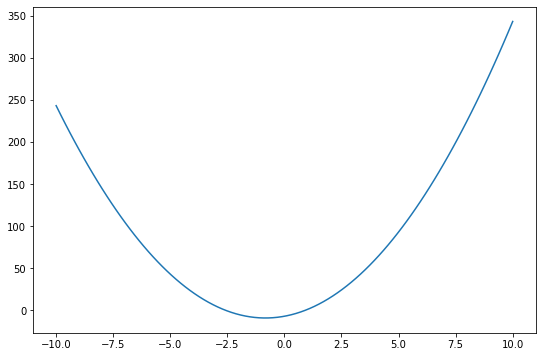

In [104]:
plt.figure(figsize=(9,6))
plt.plot(x,y)
plt.show()

### Two variables

In [229]:
f = lambda x,y: x**2 + x*y + y**2
x = np.linspace(-10,10,50)
y = np.linspace(-10,10,50)

In [234]:
x1, x2 = np.random.choice(x, 2, replace=False)
y1, y2 = np.random.choice(y, 2, replace=False)

In [235]:
f1 = f(x1,y1); f2 = f(x2,y2)

In [236]:
alpha = 0.7
lhs = alpha*f1 + (1-alpha)*f2
rhs = f((alpha*x1 + (1-alpha)*x2),(alpha*y1 + (1-alpha)*y2))

In [237]:
lhs>rhs

True

In [238]:
print(lhs,rhs)

20.80799666805498 1.2511453561016248


In [9]:
def surface_plot(f,x,y):
    X, Y = np.meshgrid(x, y)
    z = f(X,Y)
    
    fig = plt.figure(figsize=(8,6))
    ax = plt.axes(projection='3d')
    sp = ax.plot_surface(X, Y, z)
    ax.set_title('Surface Plot')
    plt.show()

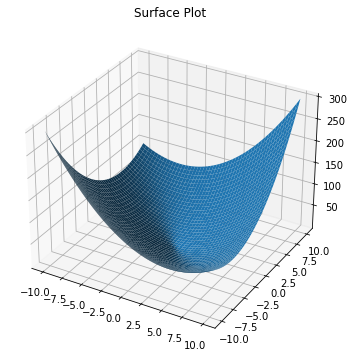

In [240]:
surface_plot(f,x,y)

## SVO

In [58]:
def swap(x1,x2):
    return x2,x1

In [67]:
def SVO(f, x1, delta=0.5, gamma=0.5, maxitr=10):
    x2 = x1 + delta
    y1, y2 = f(x1), f(x2)
    for itr in range(maxitr):
        delta = gamma*delta
        x3 = x2 + delta
        y3 = f(x3)
        while not(y2 <= y1 and y2 <= y3):
            if y2 <= y1:
                delta = gamma*delta
                x3 = x2 + delta
                y3 = f(x3)
                if y3 > y2:
                    continue
                else:
                    y1 = y2; y2 = y3
                    x1 = x2; x2 = x3
            else:
                x1, x2 = swap(x1,x2)
                y1, y2 = swap(y1,y2)
                delta = -delta
        print(y2)
    return x2, y2


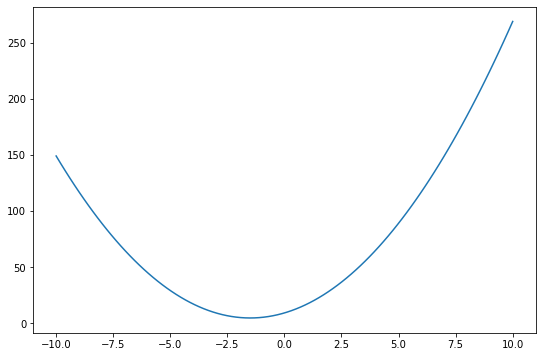

In [70]:
f = lambda x: 2*x**2 + 6*x + 9
x = np.linspace(-10,10,100)
y = f(x)
plt.figure(figsize=(9,6))
plt.plot(x,y)
plt.show()

In [71]:
SVO(f, -5, delta=1, gamma=0.5, maxitr=10)

14.625
14.0703125
13.93408203125
13.900177001953125
13.89171028137207
13.889594197273254
13.889065213501453
13.88893296988681
13.888899909128668
13.888891643948227


(-3.6666669845581055, 13.888891643948227)

## Gradient Descent

In [279]:
def grad2d(f, x, y, h=0.01):
    dfdx = (f(x+h,y) - f(x-h,y))/(2*h)    ## central difference
    dfdy = (f(x,y+h) - f(x,y-h))/(2*h)
    return np.array([dfdx,dfdy])

In [280]:
def gradient_descent(f, X0, eta=0.01, maxitr=10):
    grad_ls = []
    f_old = f(X0[0],X0[1])
    for itr in range(maxitr):
        grad = grad2d(f, X0[0], X0[1])
        X0 = X0 - eta*grad
        f_new = f(X0[0],X0[1])
        if f_new > f_old:
            break
        grad_ls.append(X0)
    return grad_ls

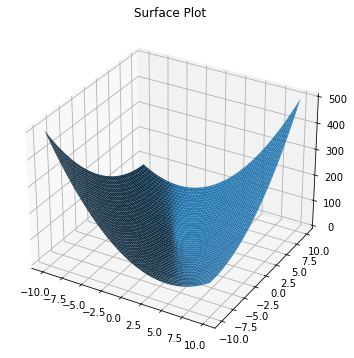

In [281]:
f = lambda x,y: x - y + 2*x*y + 2*x**2 + y**2
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
surface_plot(f, x, y)

In [282]:
X0 = np.array([10,10])
grad_ls = gradient_descent(f, X0, eta=0.05, maxitr=20)

In [283]:
grad_ls

[array([6.95, 8.05]),
 array([4.705, 6.6  ]),
 array([3.054 , 5.5195]),
 array([1.84125, 4.71215]),
 array([0.951785, 4.10681 ]),
 array([0.300747 , 3.6509505]),
 array([-0.17449745,  3.30578075]),
 array([-0.52017603,  3.04265242]),
 array([-0.77040607,  2.84040478]),
 array([-0.95036533,  2.68340491]),
 array([-1.07863276,  2.56010095]),
 array([-1.1689163 ,  2.46195413]),
 array([-1.23132845,  2.38265035]),
 array([-1.2733278 ,  2.31751816]),
 array([-1.30041406,  2.26309912]),
 array([-1.31664116,  2.21683062]),
 array([-1.32499599,  2.17681167]),
 array([-1.32767796,  2.1416301 ]),
 array([-1.32630538,  2.11023489]),
 array([-1.32206779,  2.08184194])]

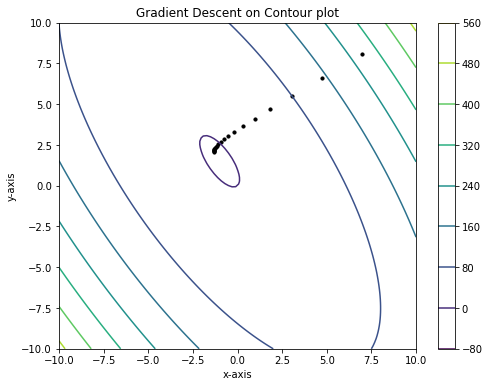

In [284]:
X, Y = np.meshgrid(x, y)
z = f(X,Y)
fig, ax = plt.subplots(figsize=(8,6))
cp = ax.contour(X, Y, z)
fig.colorbar(cp) # Add a colorbar to a plot
for p in grad_ls:
    plt.scatter(p[0],p[1], s=10, color='black')
plt.title('Gradient Descent on Contour plot')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

## Gradient and Hessian using python library

In [351]:
from sympy.abc import x, y
from sympy import ordered, Matrix, hessian

In [352]:
eq = x - y + 2*x*y + 2*x**2 + y**2

In [353]:
v = list(ordered(eq.free_symbols))
v

[x, y]

In [354]:
gradient = lambda f, v: Matrix([f]).jacobian(v)
gradient

<function __main__.<lambda>(f, v)>

In [355]:
g = gradient(eq, v)
g

Matrix([[4*x + 2*y + 1, 2*x + 2*y - 1]])

In [356]:
h = hessian(eq, v)
h

Matrix([
[4, 2],
[2, 2]])

In [357]:
gradient(eq, v).subs([(x,1),(y,1)])

Matrix([[7, 3]])

In [358]:
hessian(eq, v).subs([(x,1), (y,1), (z,1)])

Matrix([
[4, 2],
[2, 2]])

### Gradient Descent using Library

In [322]:
func = lambda x,y: x - y + 2*x*y + 2*x**2 + y**2
eq = x - y + 2*x*y + 2*x**2 + y**2
X0 = np.array([5,3])

In [329]:
def gradient_descent_with_library(f, X0, eta=0.01, maxitr=10):
    grad_ls = []
    f_old = f(X0[0],X0[1])
    for itr in range(maxitr):
        grad = np.ravel(np.array(gradient(eq,v).subs([(x,X0[0]), (y,X0[1])])).astype(np.float64))
        X0 = X0 - eta*grad
        f_new = f(X0[0],X0[1])
        if f_new > f_old:
            break
        grad_ls.append(X0)
    return grad_ls

In [333]:
grad_ls = gradient_descent_with_library(func, X0, eta=0.02, maxitr=30)

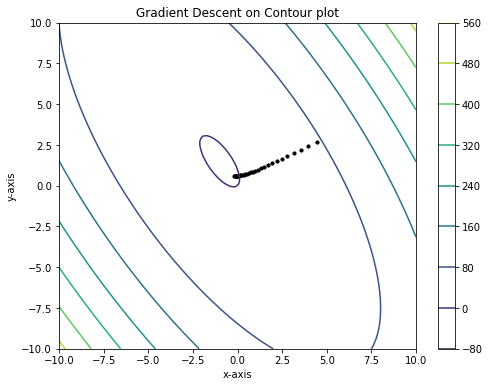

In [334]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

X, Y = np.meshgrid(x1, x2)
z = f(X,Y)
fig, ax = plt.subplots(figsize=(8,6))
cp = ax.contour(X, Y, z)
fig.colorbar(cp) # Add a colorbar to a plot
for p in grad_ls:
    plt.scatter(p[0],p[1], s=10, color='black')
plt.title('Gradient Descent on Contour plot')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

## Newton's Direction

In [345]:
eq = x - y + 2*x*y + 2*x**2 + y**2

In [364]:
g = np.ravel(np.array(gradient(eq,v).subs([(x,1),(y,5)])).astype(np.float64))
g

array([15., 11.])

In [365]:
h = np.array(hessian(eq,v).subs([(x,1),(y,5)])).astype(np.float64)
h

array([[4., 2.],
       [2., 2.]])

In [366]:
d0 = -np.dot(np.linalg.inv(h),g)
d0

array([-2. , -3.5])

## Steepest Descent

In [367]:
def steepest_descent(f, X0, maxitr=10):
    grad_ls = []
    f_old = f(X0[0],X0[1])
    for itr in range(maxitr):
        g = np.ravel(np.array(gradient(eq,v).subs([(x,X0[0]), (y,X0[1])])).astype(np.float64))
        h = np.array(hessian(eq,v).subs([(x,X0[0]),(y,X0[1])])).astype(np.float64)
        d0 = np.dot(np.linalg.inv(h),g)
        X0 = X0 - d0
        f_new = f(X0[0],X0[1])
        if f_new > f_old:
            break
        grad_ls.append(X0)
    return grad_ls

In [374]:
func = lambda x,y: x - y + 2*x*y + 2*x**2 + y**2
eq = x - y + 2*x*y + 2*x**2 + y**2
X0 = np.array([10,10])

In [375]:
grad_ls = steepest_descent(func, X0, maxitr=2)

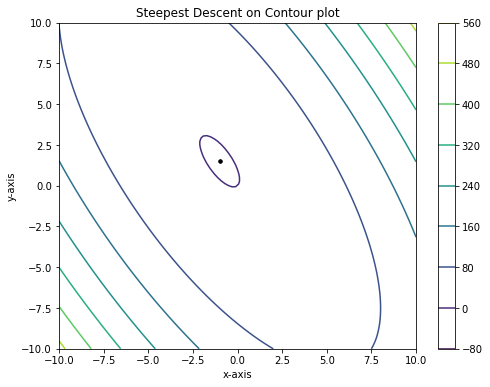

In [376]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

X, Y = np.meshgrid(x1, x2)
z = f(X,Y)
fig, ax = plt.subplots(figsize=(8,6))
cp = ax.contour(X, Y, z)
fig.colorbar(cp) # Add a colorbar to a plot
for p in grad_ls:
    plt.scatter(p[0],p[1], s=10, color='black')
plt.title('Steepest Descent on Contour plot')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

## Linear Regression using Gradient Descent

### Dataset Generation

In [377]:
def get_random_vector_in_range(a,b,n):
    arr = a + (b-a)*np.random.random(n)
    return arr

In [378]:
def add_outlier(data, alpha, lam):
    mod_data = data.copy()
    n = len(data)
    n_outlier = int(alpha*n)
    sig = np.std(data)

    outlier_index = np.random.choice(n, n_outlier,replace=False)
    for i in range(n):
        if i in outlier_index:
            mod_data[i] = mod_data[i] + get_random_vector_in_range(-lam*sig,lam*sig,1)
    return mod_data

In [383]:
a_true = 5; b_true = 2

x = np.linspace(-5,5,500)
y = a_true + b_true*x

sig = 1
noise = get_random_vector_in_range(-sig,sig,len(x))
y_noisy = y + noise

In [384]:
y_corrupted = add_outlier(y_noisy, 0.3, 2)

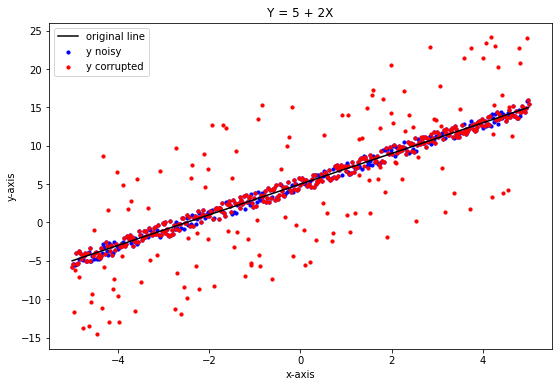

In [385]:
plt.figure(figsize=(9,6))
plt.plot(x,y,color='black',label='original line')
plt.scatter(x,y_noisy,color='blue',s=10,label='y noisy')
plt.scatter(x,y_corrupted,color='red',s=10,label='y corrupted')
plt.title("Y = {} + {}X".format(a_true,b_true))
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.show()

### Gradient Descent for 'a' and 'b'  

In [386]:
def error(x,y,a,b):
    n = len(x)
    e = y - (a+b*x)
    return np.sum(e*e)/n

In [387]:
def gradlinreg(f, x, y, ak, bk):
    n = len(x)
    t = ak + bk*x
    dfda = -(2/n) * np.sum(y - t)
    dfdb = -(2/n) * np.sum((y - t)*x)                   
    return np.array([dfda, dfdb])

In [388]:
gradlinreg(error, x, y_corrupted, 5, 3)

array([ 0.17160672, 14.48773649])

In [389]:
def gradient_descent_linreg(f, x, y, p0, eta=0.01, maxitr=10):
    grad_ls = []
    f_old = f(x,y,p0[0],p0[1])
    for itr in range(maxitr):
        grad = gradlinreg(f, x, y, p0[0], p0[1])
        p0 = p0 - eta*grad
        f_new = f(x,y,p0[0],p0[1])
        if f_new > f_old:
            break
        grad_ls.append(p0)
    return grad_ls

In [418]:
p0 = np.array([10,10])
grad_ls = gradient_descent_linreg(error, x, y_corrupted, p0, eta=0.02, maxitr=50)

In [419]:
a = np.linspace(-10,10,100)
b = np.linspace(-10,10,100)

In [420]:
aa, bb = np.meshgrid(a,b)
E = np.zeros((aa.shape))        ## Placeholder for storing errors

for i in range(aa.shape[0]):
    for j in range(bb.shape[0]):
        E[i,j] = error(x,y_corrupted,aa[i,j],bb[i,j])

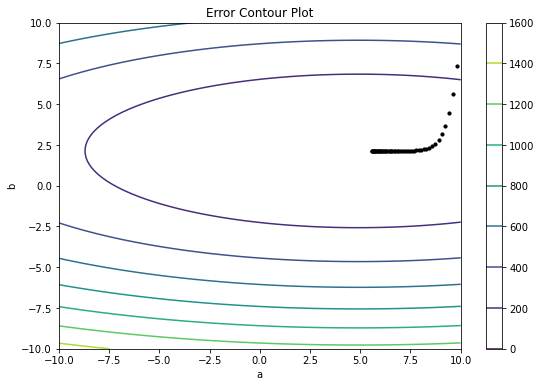

In [421]:
## Contour Plot
fig, ax = plt.subplots(figsize=(9,6))
cp = ax.contour(aa, bb, E)
fig.colorbar(cp) # Add a colorbar to a plot
for p in grad_ls:
    plt.scatter(p[0],p[1],s=10,color='black')
ax.set_title('Error Contour Plot')
ax.set_xlabel('a')
ax.set_ylabel('b')
plt.show()